In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
import imageio
from imageio import imread
import koreanize_matplotlib
import requests
from bs4 import BeautifulSoup

/tmp/ipykernel_4067/1065873031.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Step 0 데이터 분석

### Step 0.1 column 이름들 불러오기

<hr>

너무 많다..

In [2]:
raw_terror_df = pd.read_csv('../data/globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')

divider = 10

column_names = list(raw_terror_df)
temp_list = []

for column_name in list(raw_terror_df):
    if column_names.__len__()<divider:
        print(column_names)
        break

    temp_list.append(column_name)
    column_names.remove(column_name)

    if temp_list.__len__() == divider:
        print(temp_list)
        temp_list = []
        if column_names.__len__() <= divider:
            if column_names != []:print(column_name)
            break
    else:
        continue

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region']
['region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1']
['crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt']
['attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1']
['natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt']
['targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname']
['gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps']
['nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',

### Step 0.2 테러 유형 확인
<hr>

#### 결과: 암살, 하이재킹, 시설 및 인프라 공격, 폭탄, 납치, 인질극, 무장공격,비무장공격, 모름

In [3]:
attack_types1 = raw_terror_df['attacktype1_txt'].unique()
attack_types2 = raw_terror_df['attacktype2_txt'].unique()
attack_types3 = raw_terror_df['attacktype3_txt'].unique()

attack_type = []

# attacktype1_txt 열의 고유한 값들을 추가
for attack_type1 in attack_types1:
    attack_type.append(attack_type1)

# attacktype2_txt 열의 고유한 값들 중 attack_type 리스트에 없는 것만 추가
for attack_type2 in attack_types2:
    if attack_type2 not in attack_type:
        attack_type.append(attack_type2)

# attacktype3_txt 열의 고유한 값들 중 attack_type 리스트에 없는 것만 추가
for attack_type3 in attack_types3:
    if attack_type3 not in attack_type:
        attack_type.append(attack_type3)

# 고유한 공격 유형 출력
for idx, attack in enumerate(attack_type, start=1):
    print(f"{idx}: {attack}")

1: Assassination
2: Hostage Taking (Kidnapping)
3: Bombing/Explosion
4: Facility/Infrastructure Attack
5: Armed Assault
6: Hijacking
7: Unknown
8: Unarmed Assault
9: Hostage Taking (Barricade Incident)
10: nan


### Step 0.3 테러 대상 확인
<hr>

#### 결과: 민간인, 정부(외교), 정부(일반), 언론인&미디어, 경창, 유틸리티, 군, 공항&항공기, 사업, 교육기관, 폭력정당, 종교(사람/기관), 운송 수단, 관광객, NGO, 전기통신, 식품 및 수도공급, 테러리스트/비국가 민병대, 해상, 낙태 관련, 기타, 모름

In [4]:
target_types1 = raw_terror_df['targtype1_txt'].unique()
target_types2 = raw_terror_df['targtype2_txt'].unique()
target_types3 = raw_terror_df['targtype3_txt'].unique()

target_type = []

for target_types1 in target_types1:
    target_type.append(target_types1)

for target_types2 in target_types2:
    if target_types2 not in target_type:
        target_type.append(target_types2)

for target_types3 in target_types3:
    if target_types3 not in target_type:
        target_type.append(target_types3)

for idx, target in enumerate(target_type, start=1):
    print(f"{idx}: {target}")

1: Private Citizens & Property
2: Government (Diplomatic)
3: Journalists & Media
4: Police
5: Utilities
6: Military
7: Government (General)
8: Airports & Aircraft
9: Business
10: Educational Institution
11: Violent Political Party
12: Religious Figures/Institutions
13: Unknown
14: Transportation
15: Tourists
16: NGO
17: Telecommunication
18: Food or Water Supply
19: Terrorists/Non-State Militia
20: Other
21: Maritime
22: Abortion Related
23: nan


### Step 0.4 동기 확인
<hr>

#### 결과: 읽어보니까 너무 다양함..

Step 0.4.1 열 이름 지정 후 출력

In [5]:
terror_motive = raw_terror_df['motive'].unique()
print(terror_motive)

[nan 'To protest the Cairo Illinois Police Deparment'
 'To protest the War in Vietnam and the draft' ...
 'The specific motive is unknown; however, sources noted that Qari Zubai was the brother of an Afghan Local Police (ALP) officer.'
 'The specific motive is unknown; however, sources noted that Manzurul Islam Liton was critical of Jamaat-E-Islami (Bangladesh).'
 "The specific motive is unknown; however, sources posited that the civilians were abducted in order to transport stolen goods for the Lord's Resistance Army (LRA)."]


Step 0.4.2 생략된 정보 보기 위해 엑셀 파일로 저장

In [6]:
motive_df = pd.DataFrame(data = list(terror_motive), columns=["motive"])
motive_df.to_excel("../data/terror_motives.xlsm")
motive_df

motive
0                                                    NaN
1         To protest the Cairo Illinois Police Deparment
2            To protest the War in Vietnam and the draft
3                      Protest the draft and Vietnam War
4      To protest United States owned businesses in P...
...                                                  ...
13029  The Bangsamoro Islamic Freedom Movement (BIFM)...
13030  Maoists claimed responsibility for the inciden...
13031  The specific motive is unknown; however, sourc...
13032  The specific motive is unknown; however, sourc...
13033  The specific motive is unknown; however, sourc...

[13034 rows x 1 columns]

### Step 0.5 일부 데이터 가져오기

In [7]:
terror = pd.read_csv('../data/globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year', 'imonth':'Month',
                       'iday':'Day', 'country_txt':'Country',
                       'region_txt':'Region', 'attacktype1_txt':'AttackType',
                       'target1':'Target', 'nkill':'Killed',
                       'nwound':'Wounded', 'summary':'Summary',
                       'gname':'Group', 'targtype1_txt':
                       'Target_type', 'weaptype1_txt':
                       'Weapon_type', 'motive':'Motive'},
              inplace=True)

terror = terror[['Year', 'Month', 'Day', 'Country', 'Region', 'city',
                 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
                 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive']]
terror['casualities'] = terror['Killed'] + terror['Wounded']
terror.head()

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.432608  -99.133207     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.983773   23.728157               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

                 Weapon_type Motive  casualities  
0                    Unknown    NaN          1.0  
1                    Unknown    NaN          0.0  
2                    Unknown    NaN          1.0  
3  Explosives/Bombs/Dynamite    NaN          NaN  
4                 Incendiary    NaN          NaN

In [8]:
terror[terror['Country']=='South Korea'][:5]

Year  Month  Day      Country     Region                         city  \
2441   1974      8   15  South Korea  East Asia                        Seoul   
15659  1982      3   18  South Korea  East Asia                        Busan   
19745  1983      9   22  South Korea  East Asia                        Daegu   
29076  1986      9   14  South Korea  East Asia  Gimpo International Airport   
29621  1986     12   15  South Korea  East Asia                        Busan   

        latitude   longitude                      AttackType  Killed  Wounded  \
2441   37.566535  126.977969                   Assassination     1.0      0.0   
15659  35.179554  129.075642  Facility/Infrastructure Attack     1.0      3.0   
19745  35.871435  128.601445               Bombing/Explosion     1.0      4.0   
29076  37.558947  126.798341               Bombing/Explosion     5.0     19.0   
29621  35.179554  129.075642                   Armed Assault     0.0     11.0   

                                                  Target Summary  \
2441                           wife, Pres. Chung Hu Park     NaN   
15659                   US Government Information Office     NaN   
19745  US Cultural Center (housed in a 5 story building)     NaN   
29076                        Kimpo International Airport     NaN   
29621                           US Information Svce Bldg     NaN   

                     Group              Target_type  \
2441   Korean Youth League     Government (General)   
15659              Unknown  Government (Diplomatic)   
19745              Unknown  Government (Diplomatic)   
29076              Unknown      Airports & Aircraft   
29621     Student Radicals     Government (General)   

                     Weapon_type Motive  casualities  
2441                    Firearms    NaN          1.0  
15659                 Incendiary    NaN          4.0  
19745  Explosives/Bombs/Dynamite    NaN          5.0  
29076  Explosives/Bombs/Dynamite    NaN         24.0  
29621                      Melee    NaN         11.0

# Step 1 연도별 테러 숫자 시각화

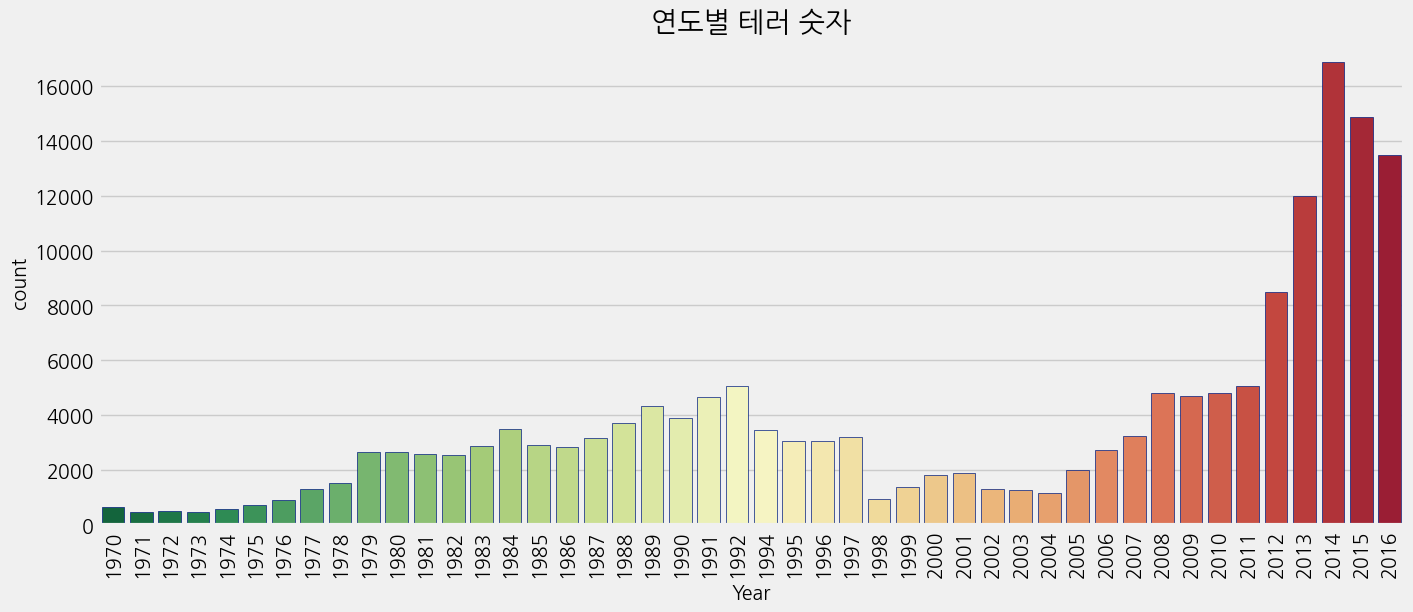

In [9]:
%matplotlib inline
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', data=terror, palette='RdYlGn_r', edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('연도별 테러 숫자')
plt.show()

# Step 2 테러가 많이 일어난 국가 Top10 시각화

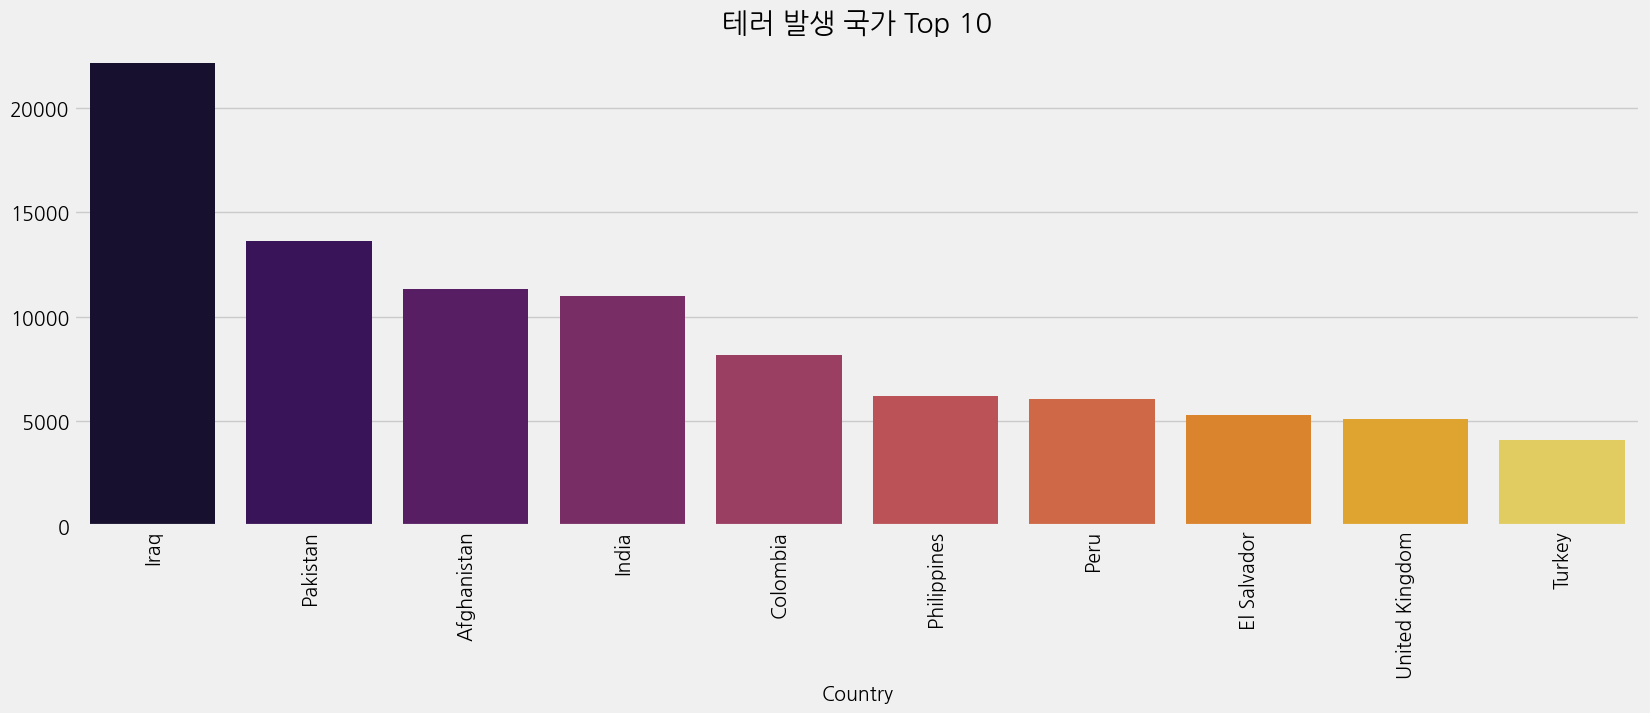

In [10]:
plt.subplots(figsize=(18,6))
sns.barplot(x=terror['Country'].value_counts()[:10].index,
            y=terror['Country'].value_counts()[:10].values,
            palette='inferno')
plt.title('테러 발생 국가 Top 10')
plt.xticks(rotation=90)
plt.show()

# Step 3 특정 연도 이전의 테러 경향과 그 후의 테러 경향
<hr/>

1. 2005년부터 테러가 다시 증가세로 들어감. -> 연도 후보1
2. 2012년부터 기존 최고 횟수가 갱신됨. -> 연도 후보2
3. 가설 세우기
    + 20세기 테러:  
    국가나 정부를 타겟으로 하는 테러가 늘어남. 이는 정치적, 이념적 갈등이 전 세계에 확산되고 국가 간 갈등이 심화되면서 발생.  
    테러리스트들은 폭발물 뿐만 아니라 생화학 무기, 핵무기, 사이버 공격 등과 같은 다양한 무기와 기술을 사용.  
    국제적인 테러 조직들이 등장하면서 테러의 범위와 규모가 확대되었으며, 지능 및 정보 수집 능력을 사용하여 공격을 계획하고 수행.  
    소셜 미디어와 인터넷의 등장으로 테러 조직은 홍보 및 모집을 용이하게 할 수 있게 되었으며, 전 세계적인 영향력을 더욱 증대시킴.  
    + 21세기 테러:  
    국제적인 테러 조직들의 활동이 더욱 활발해짐. 알카에다, 이슬람국가 등의 테러 조직이 세계적인 영향력을 행사하고 있음.  
    테러리스트들은 자살 폭탄 테러, 자동차 폭탄, 독사 및 생화학 무기, 사이버 공격 등과 같은 다양한 공격 수단을 사용.  
    인터넷과 소셜 미디어를 통해 라디칼 이슬람 이념을 확산하고, 모집 및 교육을 진행. 이로 인해 소위 '인터넷 테러'가 늘어나고 있음.  
    정치적인 목표뿐만 아니라 종교적, 이념적 이유로 인한 테러도 증가하고 있음.  
4. 가설 검증: 20세기 VS 21세기
    + 테러에 사용된 무기 비교 
    + 테러 피해 대상 비교 
    + 극단적 이슬람 주의 단체에 해당하는 테러 유형을 20세기와 21세기로 확인
5. 결론
    + 이슬람 권 대륙 및 국가에서 테러 발생이 20세기 보다 21세기에 더 많아 짐을 확인.


### Step 3.1 지역별 테러 행위 수

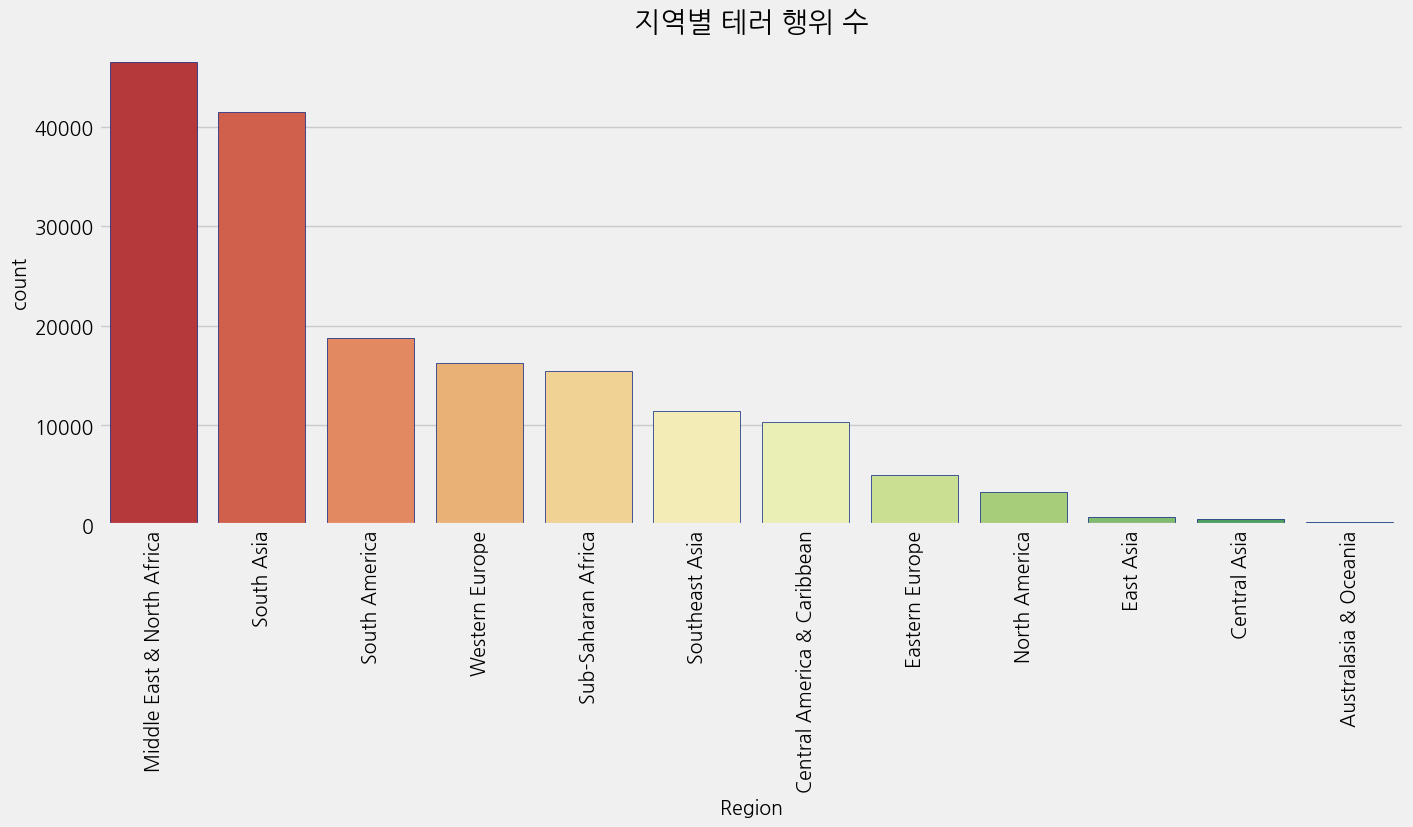

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Region', data=terror, palette='RdYlGn', 
              edgecolor=sns.color_palette('dark',7),
              order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('지역별 테러 행위 수')
plt.show()

### Step 3.2 지역별 테러행위 + 20세기 21세기 비교
<hr>

결과: 중동&북아프리카 13.5% -> 37.3%

In [12]:
# 20세기 데이터: 1900년부터 1999년까지
century_20 = terror[(terror['Year'] >= 1900) & (terror['Year'] <= 2000)]

# 21세기 데이터: 2000년부터 현재까지
century_21 = terror[terror['Year'] > 2000]

# 20세기 테러 발생 수
century_20_counts = century_20['Region'].value_counts().sort_values(ascending=False)

# 21세기 테러 발생 수
century_21_counts = century_21['Region'].value_counts().sort_values(ascending=False)

# 각 세기별 비율 계산
century_20_percent = century_20_counts / century_20_counts.sum()
century_21_percent = century_21_counts / century_21_counts.sum()

# 3% 미만 요소들을 "etc"로 합치기
threshold = 0.03
century_20_combined = century_20_percent[century_20_percent >= threshold]
century_20_combined['etc'] = century_20_percent[century_20_percent < threshold].sum()

century_21_combined = century_21_percent[century_21_percent >= threshold]
century_21_combined['etc'] = century_21_percent[century_21_percent < threshold].sum()

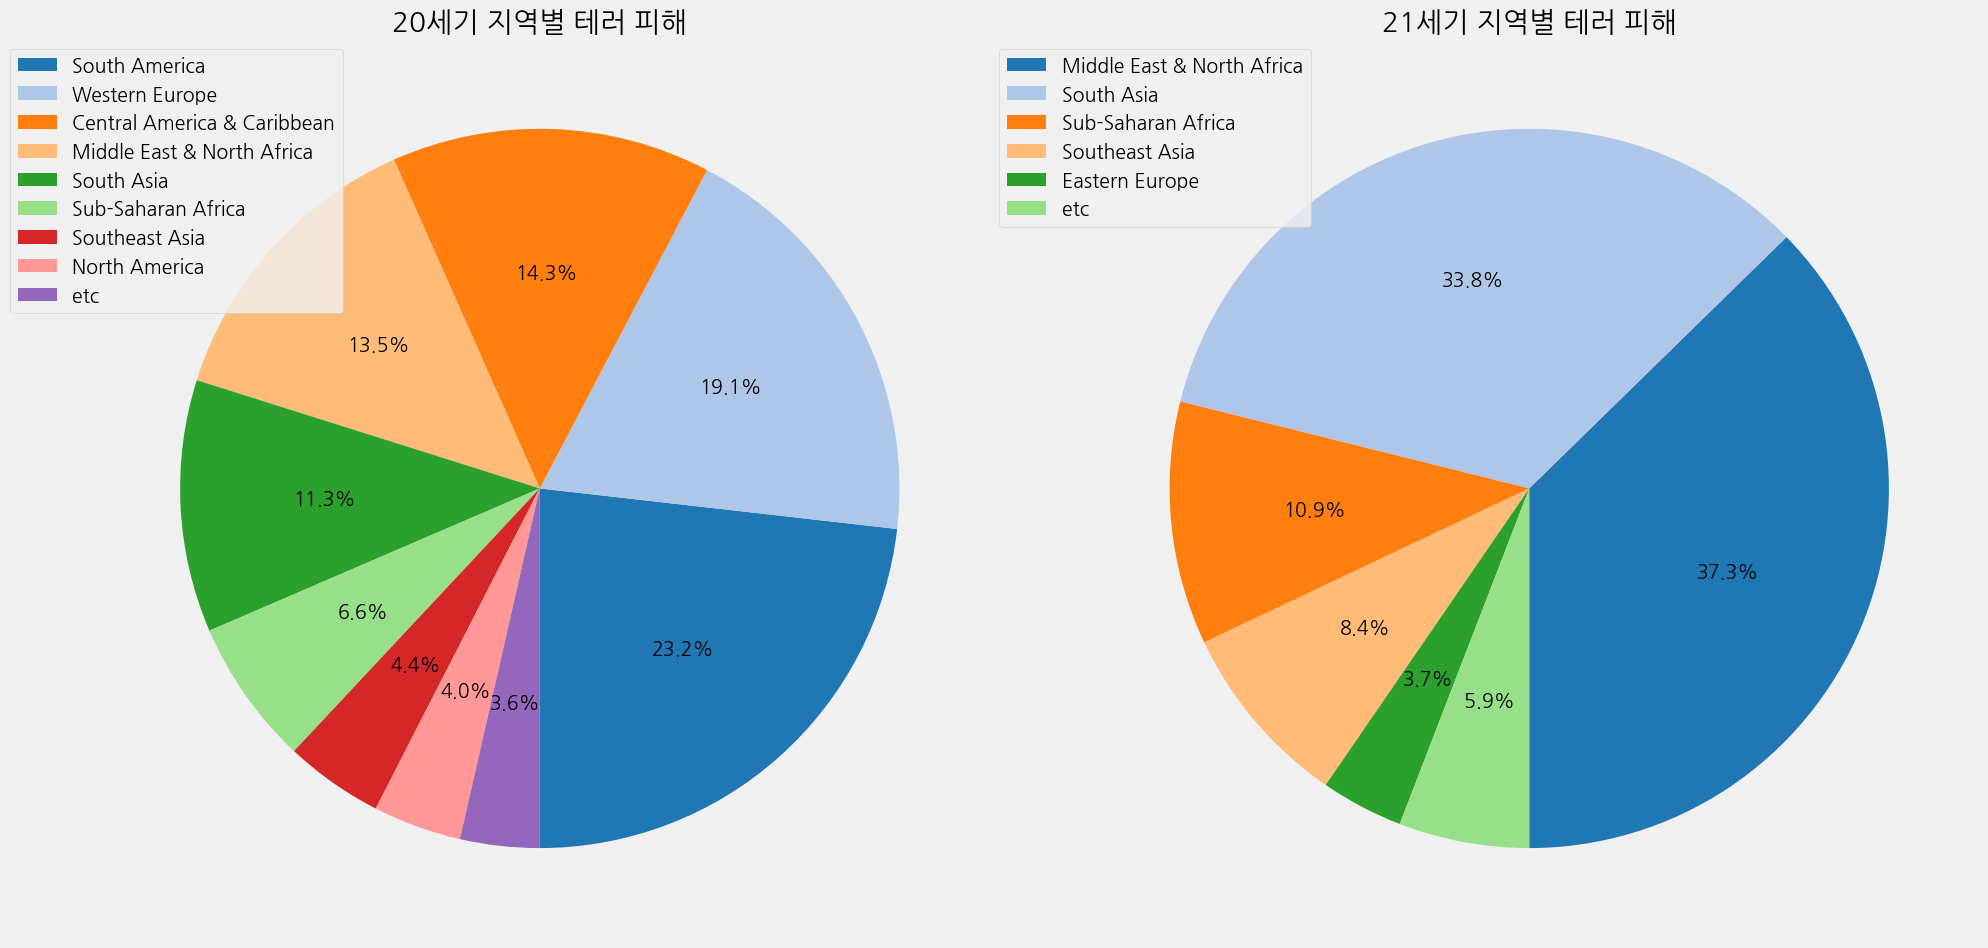

In [13]:
# 색상 팔레트 생성
colors = plt.cm.tab20.colors

# 그래프 그리기
plt.figure(figsize=(20, 10))

# 20세기 그래프
plt.subplot(1, 2, 1)
plt.pie(century_20_combined, autopct='%1.1f%%', startangle=270, colors=colors)
plt.title('20세기 지역별 테러 피해')
plt.legend(century_20_combined.index, loc="upper left", bbox_to_anchor=(-0.1, 1))

# 21세기 그래프
plt.subplot(1, 2, 2)
plt.pie(century_21_combined, autopct='%1.1f%%', startangle=270, colors=colors)
plt.title('21세기 지역별 테러 피해')
plt.legend(century_21_combined.index, loc="upper left", bbox_to_anchor=(-0.1, 1))

plt.tight_layout()
plt.show()

### Step 3.2 국가별 테러 발생 + 20세기 21세기 비교
<hr>

결과: 이슬람 관련 국가 비율 증가

In [14]:
# 20세기 테러 발생 수
century_20_counts = century_20['Country'].value_counts().sort_values(ascending=False)

# 21세기 테러 발생 수
century_21_counts = century_21['Country'].value_counts().sort_values(ascending=False)

# 각 세기별 비율 계산
century_20_percent = century_20_counts / century_20_counts.sum()
century_21_percent = century_21_counts / century_21_counts.sum()

# 2% 미만 요소들을 "etc"로 합치기
threshold = 0.02
century_20_combined = century_20_percent[century_20_percent >= threshold]
century_20_combined['etc'] = century_20_percent[century_20_percent < threshold].sum()

century_21_combined = century_21_percent[century_21_percent >= threshold]
century_21_combined['etc'] = century_21_percent[century_21_percent < threshold].sum()

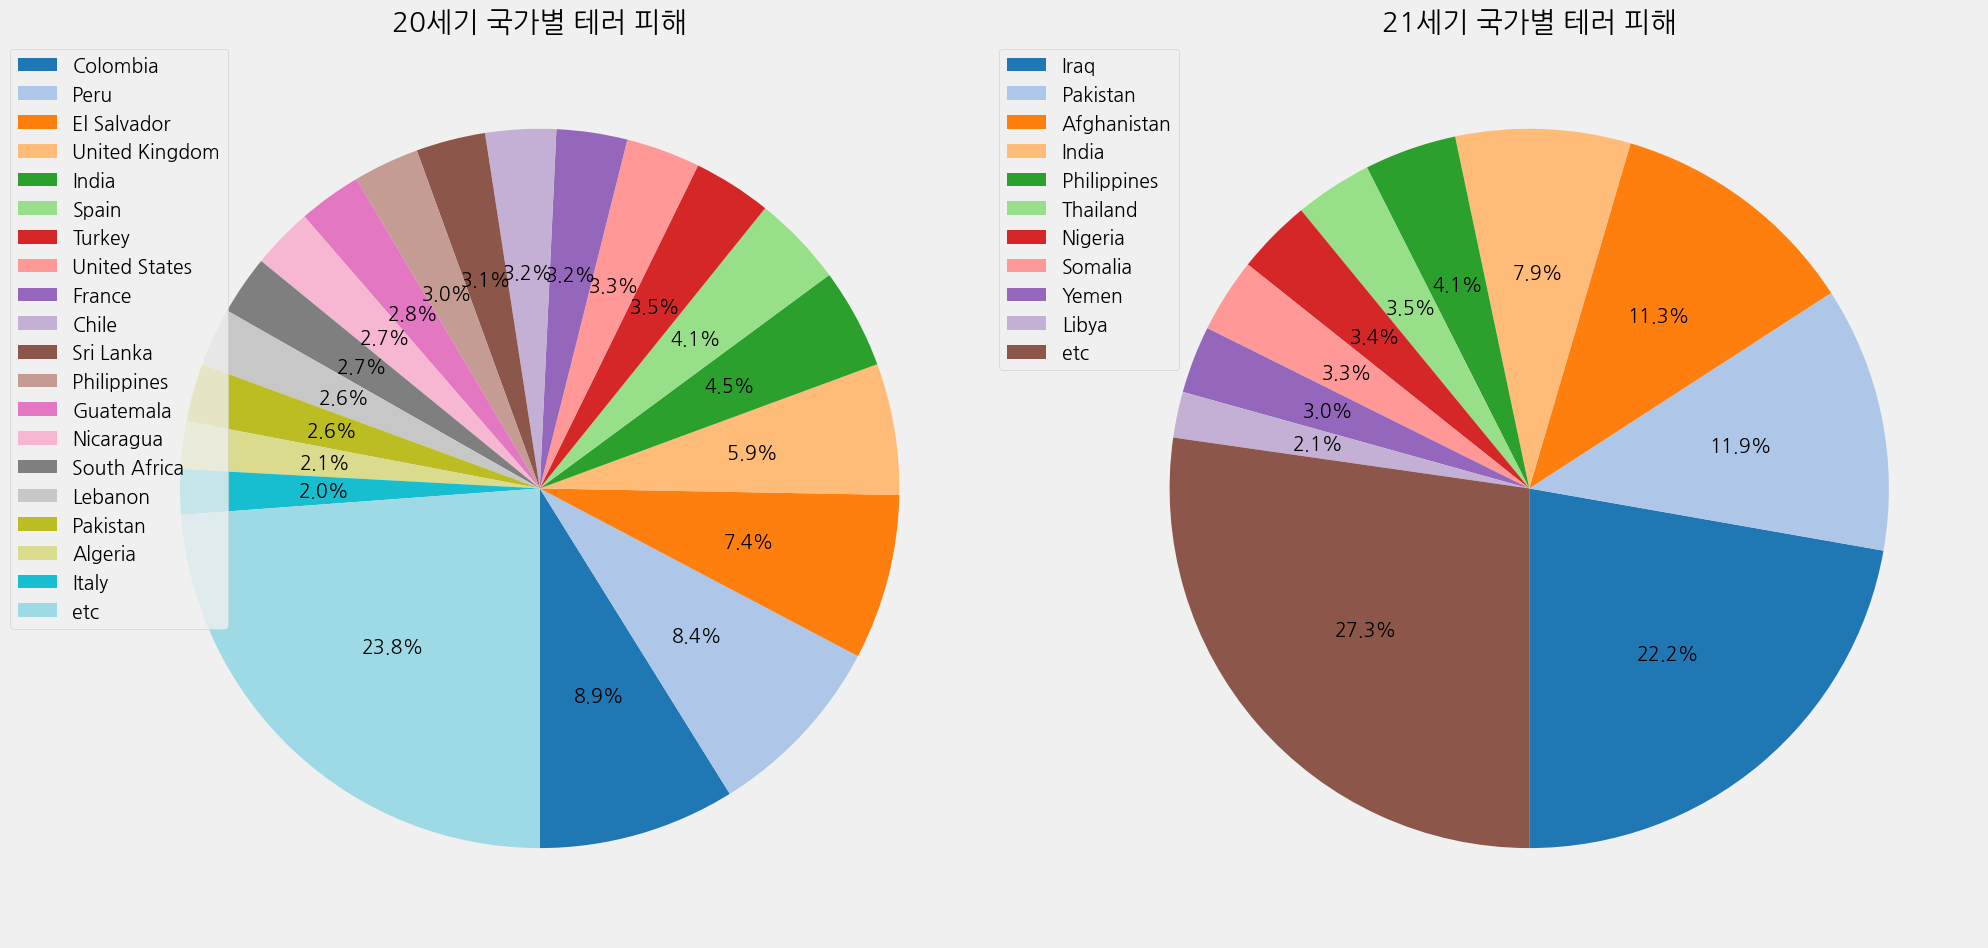

In [15]:
# 색상 팔레트 생성
colors = plt.cm.tab20.colors

# 그래프 그리기
plt.figure(figsize=(20, 10))

# 20세기 그래프
plt.subplot(1, 2, 1)
plt.pie(century_20_combined, autopct='%1.1f%%', startangle=270, colors=colors)
plt.title('20세기 국가별 테러 피해')
plt.legend(century_20_combined.index, loc="upper left", bbox_to_anchor=(-0.1, 1))

# 21세기 그래프
plt.subplot(1, 2, 2)
plt.pie(century_21_combined, autopct='%1.1f%%', startangle=270, colors=colors)
plt.title('21세기 국가별 테러 피해')
plt.legend(century_21_combined.index, loc="upper left", bbox_to_anchor=(-0.1, 1))

plt.tight_layout()
plt.show()

### Step 3.3.1 테러 피해 대상 + 20세기 21세기 비교
<hr>

결과: 피해 대상 간소화 필요

In [16]:
# 20세기 테러 발생 수
century_20_counts = century_20['Target'].value_counts().sort_values(ascending=False)

# 21세기 테러 발생 수
century_21_counts = century_21['Target'].value_counts().sort_values(ascending=False)

# 각 세기별 비율 계산
century_20_percent = century_20_counts / century_20_counts.sum()
century_21_percent = century_21_counts / century_21_counts.sum()

# 1% 미만 요소들을 "etc"로 합치기
threshold = 0.01
century_20_combined = century_20_percent[century_20_percent >= threshold]
century_20_combined['etc'] = century_20_percent[century_20_percent < threshold].sum()

century_21_combined = century_21_percent[century_21_percent >= threshold]
century_21_combined['etc'] = century_21_percent[century_21_percent < threshold].sum()

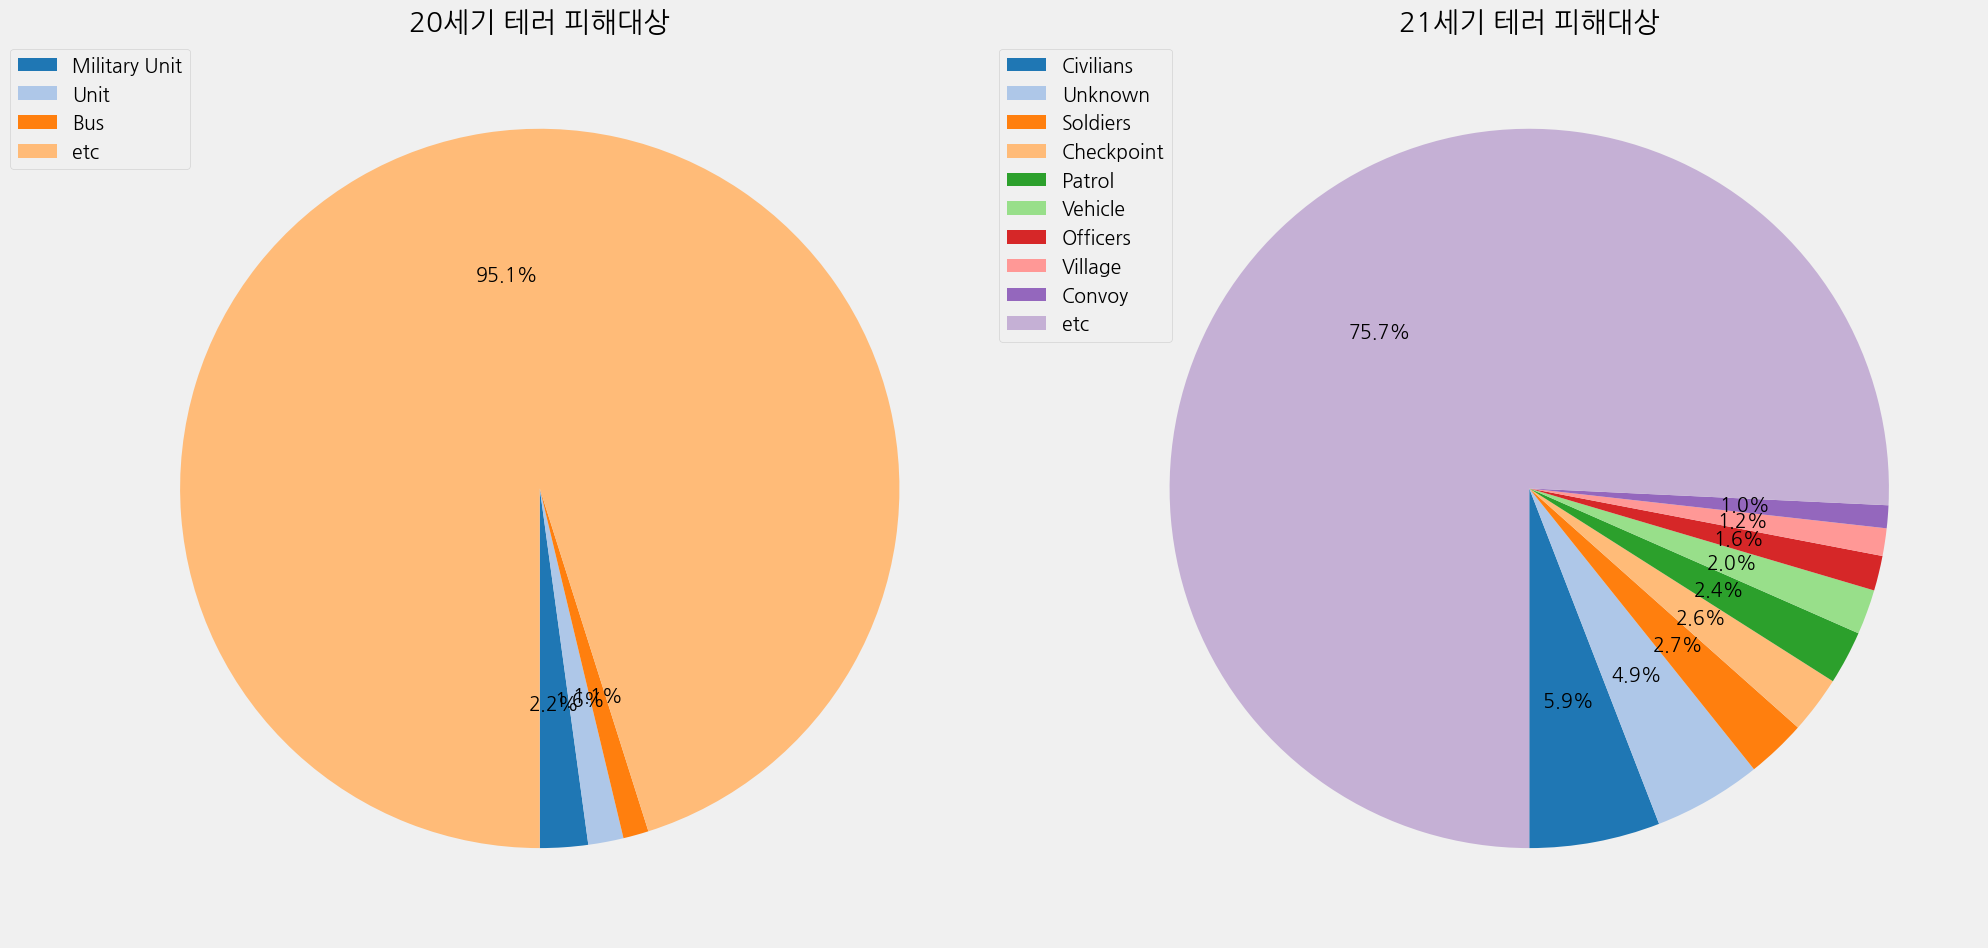

In [17]:
# 색상 팔레트 생성
colors = plt.cm.tab20.colors

# 그래프 그리기
plt.figure(figsize=(20, 10))

# 20세기 그래프
plt.subplot(1, 2, 1)
plt.pie(century_20_combined, autopct='%1.1f%%', startangle=270, colors=colors)
plt.title('20세기 테러 피해대상')
plt.legend(century_20_combined.index, loc="upper left", bbox_to_anchor=(-0.1, 1))

# 21세기 그래프
plt.subplot(1, 2, 2)
plt.pie(century_21_combined, autopct='%1.1f%%', startangle=270, colors=colors)
plt.title('21세기 테러 피해대상')
plt.legend(century_21_combined.index, loc="upper left", bbox_to_anchor=(-0.1, 1))

plt.tight_layout()
plt.show()

### Step 3.3.2 테러 피해 대상 간소화 + 20세기 21세기 비교
<hr>

결과: 피해 대상: 170350 -> 중복 제외: 82974 -> 자연어처리를 통한 텍스트 분류 필요.. -> 시간 남을 시 다시 도전..

In [18]:
terror_victime_list = terror['Target']
print(len(terror_victime_list))
print(terror_victime_list)

170350
0                                             Julio Guzman
1                                  Nadine Chaval, daughter
2                                                 Employee
3                                             U.S. Embassy
4                                           U.S. Consulate
                                ...                       
170345                                            Soldiers
170346                            Convoy of Relief Workers
170347                                             Village
170348    Residence of Journalist: Gabriel Valencia Juarez
170349                                                Town
Name: Target, Length: 170350, dtype: object


In [19]:
terror_victime_list = terror['Target'].unique()
print(len(terror_victime_list))

82974


### Step 3.4 테러 수단 + 20세기 21세기 비교
<hr>

결과: 테러 방법에는 큰 차이 없음

In [20]:
# 20세기 테러 발생 수
century_20_counts = century_20['Weapon_type'].value_counts().sort_values(ascending=False)

# 21세기 테러 발생 수
century_21_counts = century_21['Weapon_type'].value_counts().sort_values(ascending=False)

# 각 세기별 비율 계산
century_20_percent = century_20_counts / century_20_counts.sum()
century_21_percent = century_21_counts / century_21_counts.sum()

# 1% 미만 요소들을 "etc"로 합치기
threshold = 0.03
century_20_combined = century_20_percent[century_20_percent >= threshold]
century_20_combined['etc'] = century_20_percent[century_20_percent < threshold].sum()

century_21_combined = century_21_percent[century_21_percent >= threshold]
century_21_combined['etc'] = century_21_percent[century_21_percent < threshold].sum()

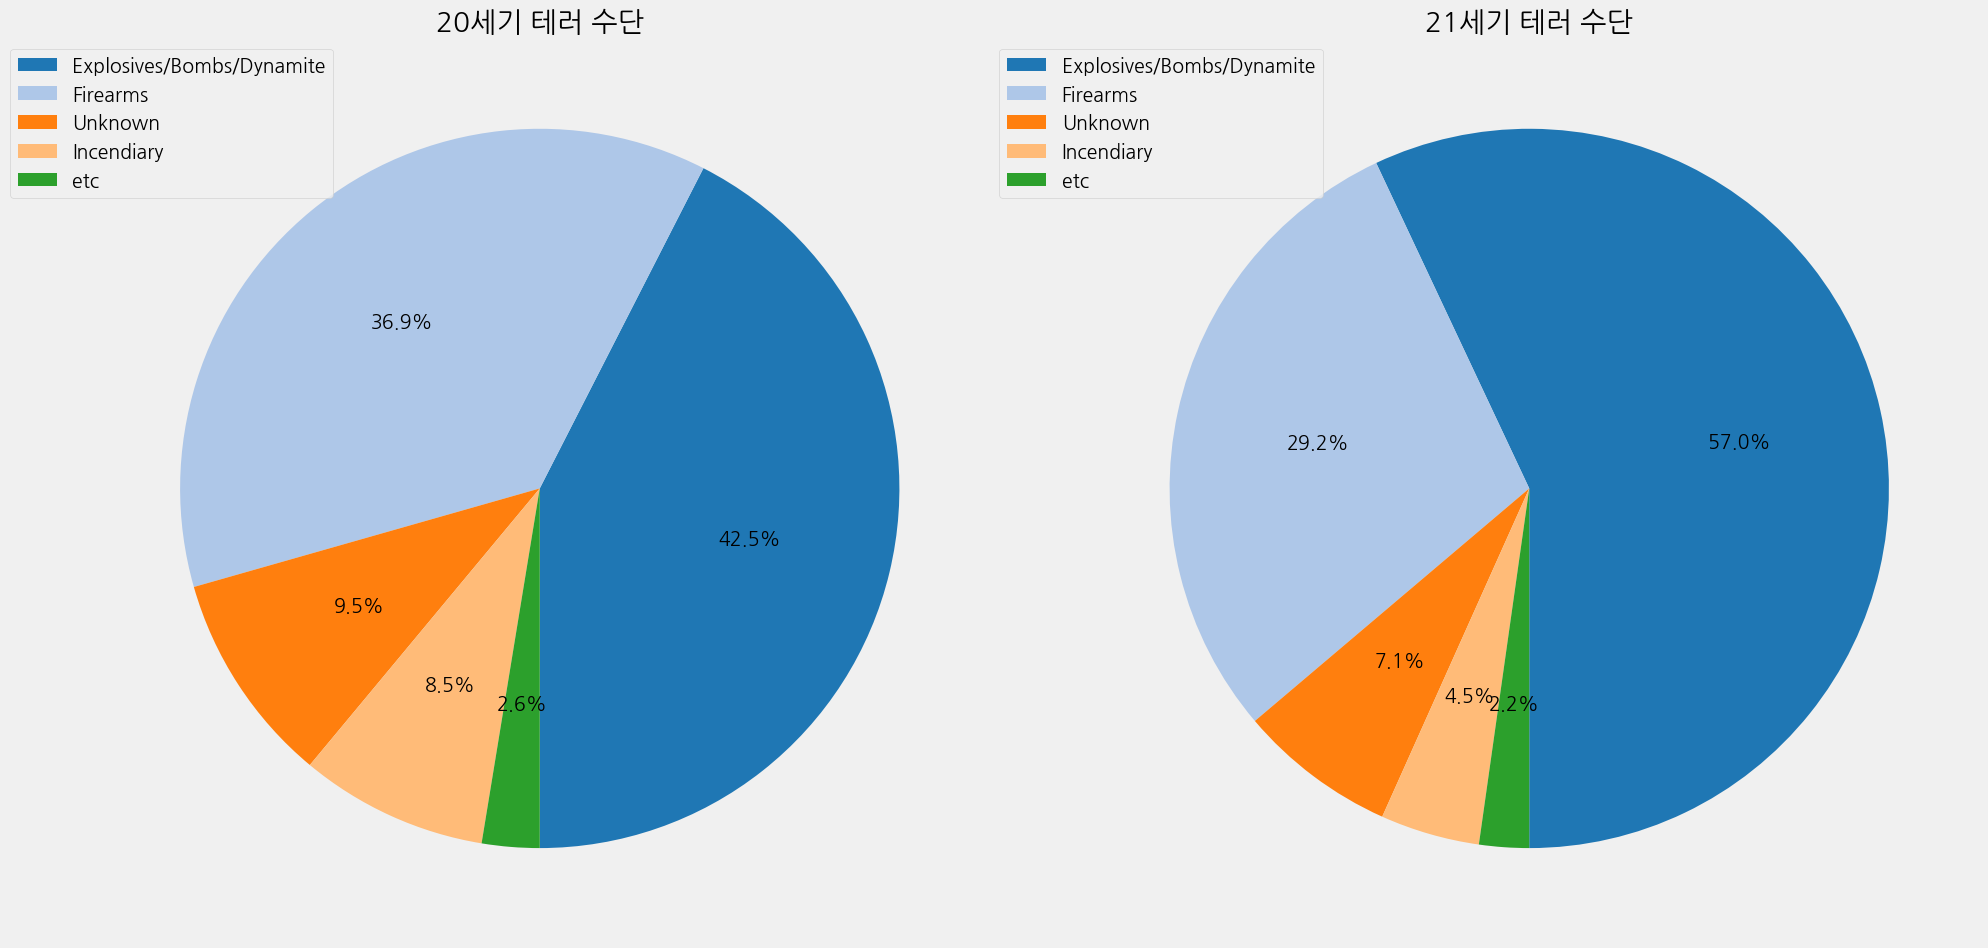

In [21]:
# 색상 팔레트 생성
colors = plt.cm.tab20.colors

# 그래프 그리기
plt.figure(figsize=(20, 10))

# 20세기 그래프
plt.subplot(1, 2, 1)
plt.pie(century_20_combined, autopct='%1.1f%%', startangle=270, colors=colors)
plt.title('20세기 테러 수단')
plt.legend(century_20_combined.index, loc="upper left", bbox_to_anchor=(-0.1, 1))

# 21세기 그래프
plt.subplot(1, 2, 2)
plt.pie(century_21_combined, autopct='%1.1f%%', startangle=270, colors=colors)
plt.title('21세기 테러 수단')
plt.legend(century_21_combined.index, loc="upper left", bbox_to_anchor=(-0.1, 1))

plt.tight_layout()
plt.show()

### Step 3.5 테러 유형 + 20세기 21세기 비교
<hr>

결과: 큰 차이 없음

In [22]:
# 20세기 테러 발생 수
century_20_counts = century_20['AttackType'].value_counts().sort_values(ascending=False)

# 21세기 테러 발생 수
century_21_counts = century_21['AttackType'].value_counts().sort_values(ascending=False)

# 각 세기별 비율 계산
century_20_percent = century_20_counts / century_20_counts.sum()
century_21_percent = century_21_counts / century_21_counts.sum()

# 1% 미만 요소들을 "etc"로 합치기
threshold = 0.03
century_20_combined = century_20_percent[century_20_percent >= threshold]
century_20_combined['etc'] = century_20_percent[century_20_percent < threshold].sum()

century_21_combined = century_21_percent[century_21_percent >= threshold]
century_21_combined['etc'] = century_21_percent[century_21_percent < threshold].sum()

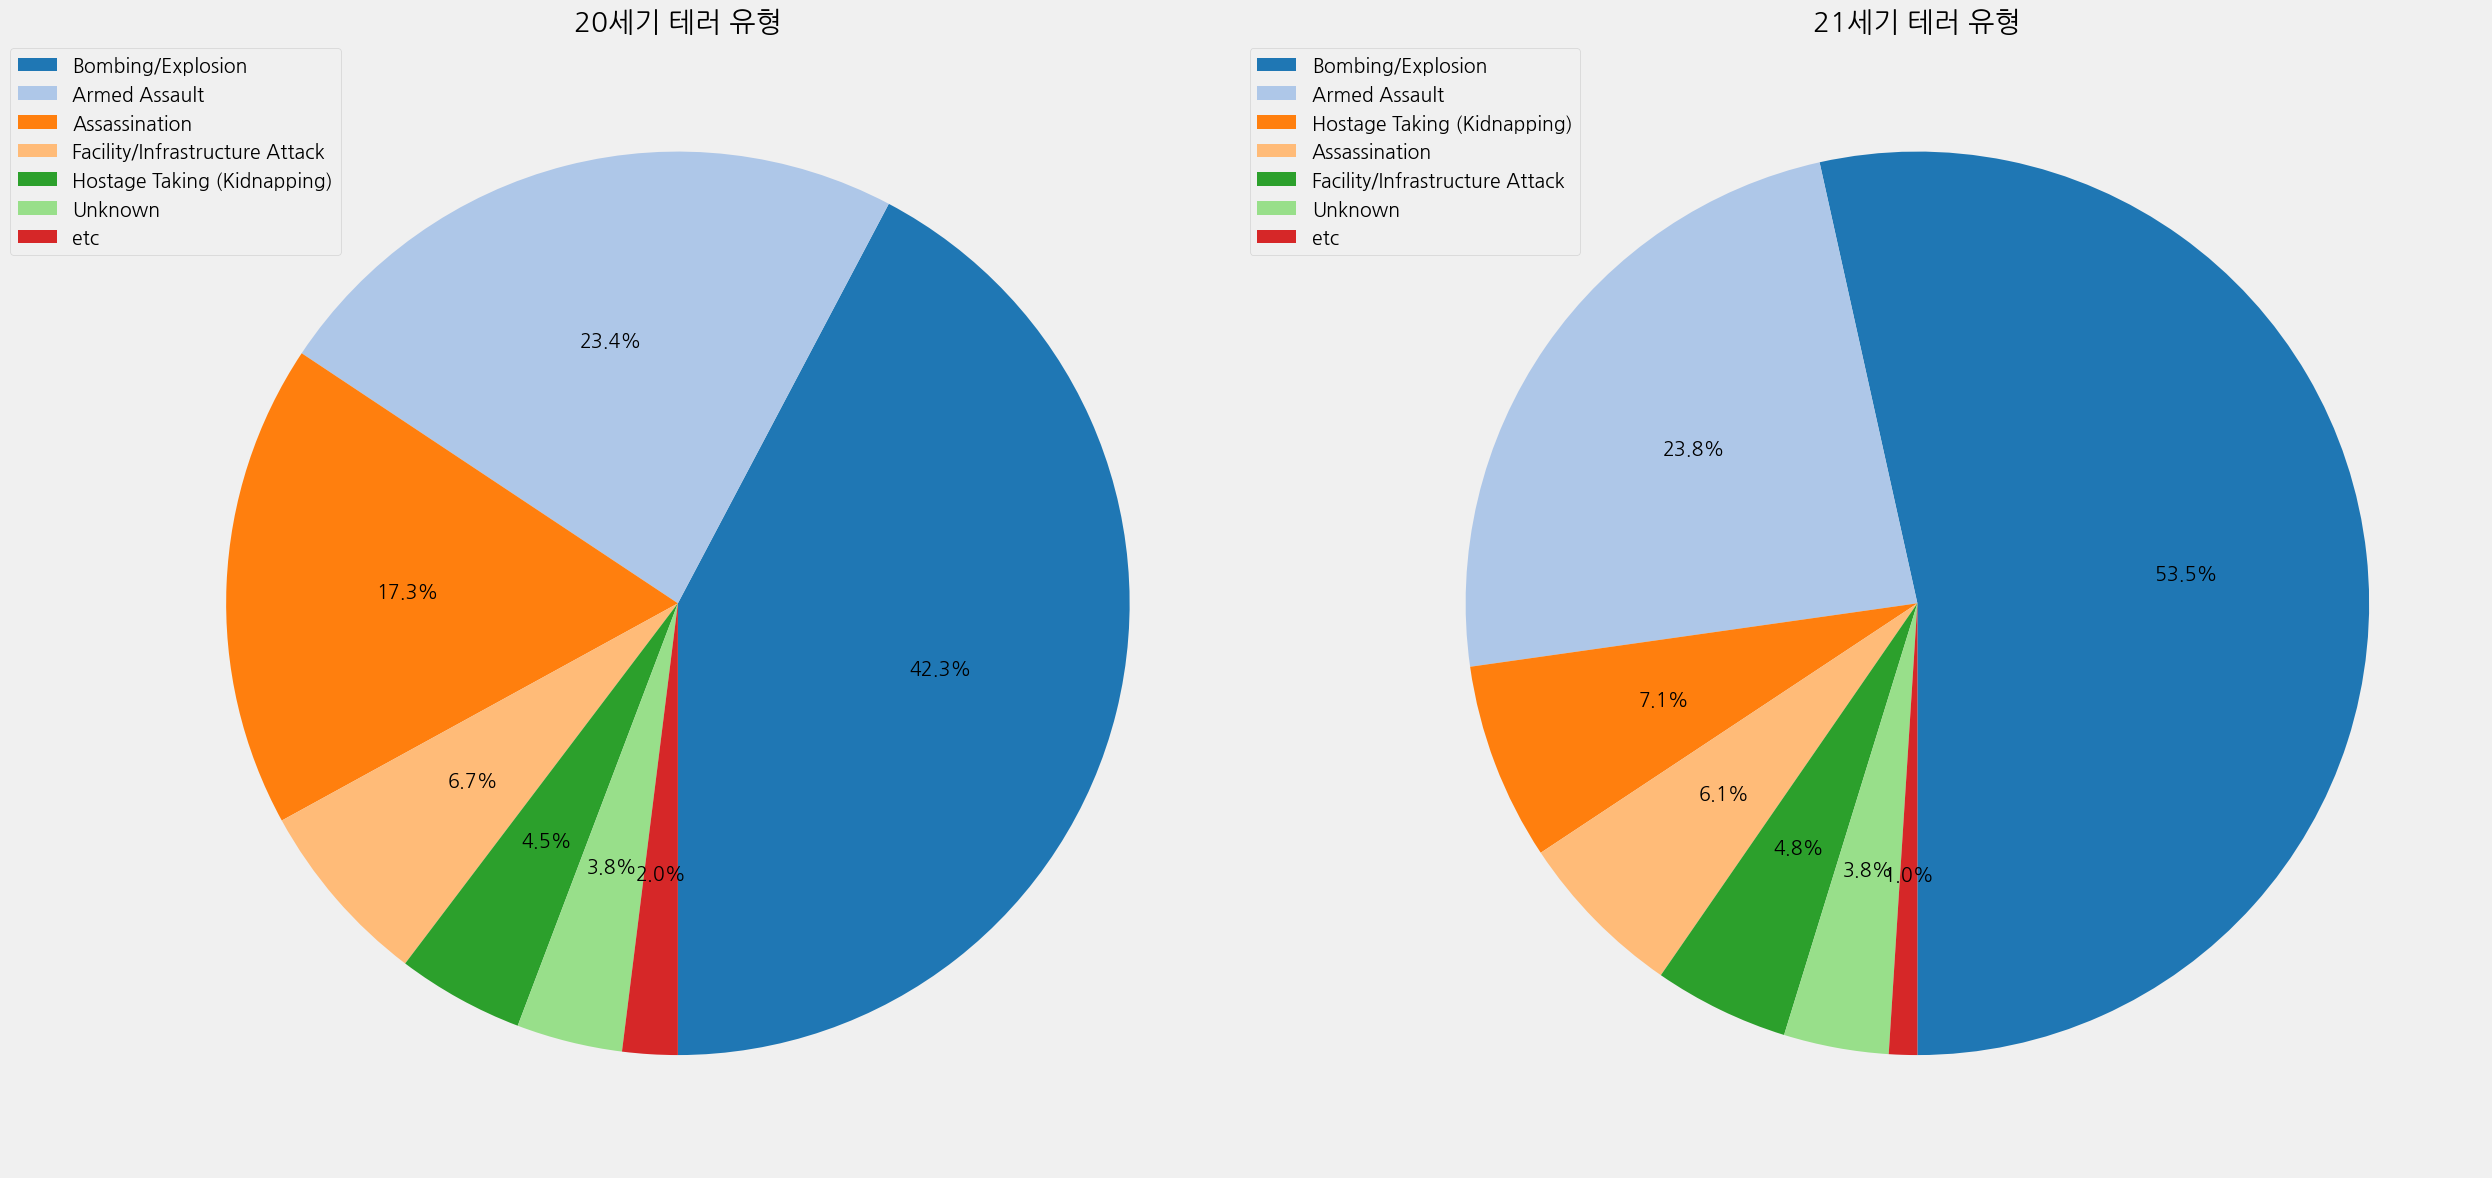

In [23]:
# 색상 팔레트 생성
colors = plt.cm.tab20.colors

# 그래프 그리기
plt.figure(figsize=(25, 15))

# 20세기 그래프
plt.subplot(1, 2, 1)
plt.pie(century_20_combined, autopct='%1.1f%%', startangle=270, colors=colors)
plt.title('20세기 테러 유형')
plt.legend(century_20_combined.index, loc="upper left", bbox_to_anchor=(-0.1, 1))

# 21세기 그래프
plt.subplot(1, 2, 2)
plt.pie(century_21_combined, autopct='%1.1f%%', startangle=270, colors=colors)
plt.title('21세기 테러 유형')
plt.legend(century_21_combined.index, loc="upper left", bbox_to_anchor=(-0.1, 1))

plt.tight_layout()
plt.show()

# Step 4 중동&북아프리카, 남아메리카, 서유럽, 남동아시아 4개 지역 비교
+ 테러 공격형태  
+ 사망자 사상자 수
<hr>

결론: 중동의 폭탄 테러 비율이 근소하게 높았으며, 사상자 수와 그 비율이 가장 높았다.

### Step 4.1 데이터 필터링

In [24]:
# Middle East & North Africa 지역에 해당하는 데이터 필터링
middle_east_north_africa = terror[terror['Region'] == 'Middle East & North Africa']

# South America 지역에 해당하는 데이터 필터링
south_america = terror[terror['Region'] == 'South America']

# Western Europe 지역에 해당하는 데이터 필터링
western_europe = terror[terror['Region'] == 'Western Europe']

# South Asia 지역에 해당하는 데이터 필터링
south_asia = terror[terror['Region'] == 'South Asia']

# 각 지역에 대한 AttackType과 casualities 값 가져오기
middle_east_north_africa_data = middle_east_north_africa[['AttackType', 'casualities']]
south_america_data = south_america[['AttackType', 'casualities']]
western_europe_data = western_europe[['AttackType', 'casualities']]
south_asia_data = south_asia[['AttackType', 'casualities']]


In [25]:
print("Middle East & North Africa 지역 데이터:")
print(middle_east_north_africa_data.head())

print("\nSouth America 지역 데이터:")
print(south_america_data.head())

print("\nWestern Europe 지역 데이터:")
print(western_europe_data.head())

print("\nSouth Asia 지역 데이터:")
print(south_asia_data.head())

Middle East & North Africa 지역 데이터:
            AttackType  casualities
95       Armed Assault          NaN
133  Bombing/Explosion          2.0
158  Bombing/Explosion          0.0
195  Bombing/Explosion          0.0
226  Bombing/Explosion          0.0

South America 지역 데이터:
                      AttackType  casualities
6                  Assassination          0.0
21                 Armed Assault          0.0
27   Hostage Taking (Kidnapping)          0.0
123  Hostage Taking (Kidnapping)          0.0
152  Hostage Taking (Kidnapping)          0.0

Western Europe 지역 데이터:
                        AttackType  casualities
3                Bombing/Explosion          NaN
12                       Hijacking          0.0
59                   Armed Assault          NaN
62  Facility/Infrastructure Attack         16.0
79               Bombing/Explosion          0.0

South Asia 지역 데이터:
             AttackType  casualities
585       Assassination          1.0
1185          Hijacking          0.0
1790   

### Step 4.2 공격유형 비교

In [26]:
# 5% 미만 값을 "etc"로 합치기
threshold = 0.05

def combine_values(data):
    # 전체 값을 합산
    total = data.sum()
    # 임계값 이하의 값들을 합산하여 "etc"로 대체
    other = data[data < total * threshold].sum()
    # 합산된 값을 반환
    return other

# 각 지역에 대해 AttackType의 값을 결합하여 가져오기
middle_east_north_africa_attack_type_combined = middle_east_north_africa_data['AttackType'].value_counts().copy()
middle_east_north_africa_attack_type_combined['etc'] = combine_values(middle_east_north_africa_attack_type_combined)

south_america_attack_type_combined = south_america_data['AttackType'].value_counts().copy()
south_america_attack_type_combined['etc'] = combine_values(south_america_attack_type_combined)

western_europe_attack_type_combined = western_europe_data['AttackType'].value_counts().copy()
western_europe_attack_type_combined['etc'] = combine_values(western_europe_attack_type_combined)

south_asia_attack_type_combined = south_asia_data['AttackType'].value_counts().copy()
south_asia_attack_type_combined['etc'] = combine_values(south_asia_attack_type_combined)

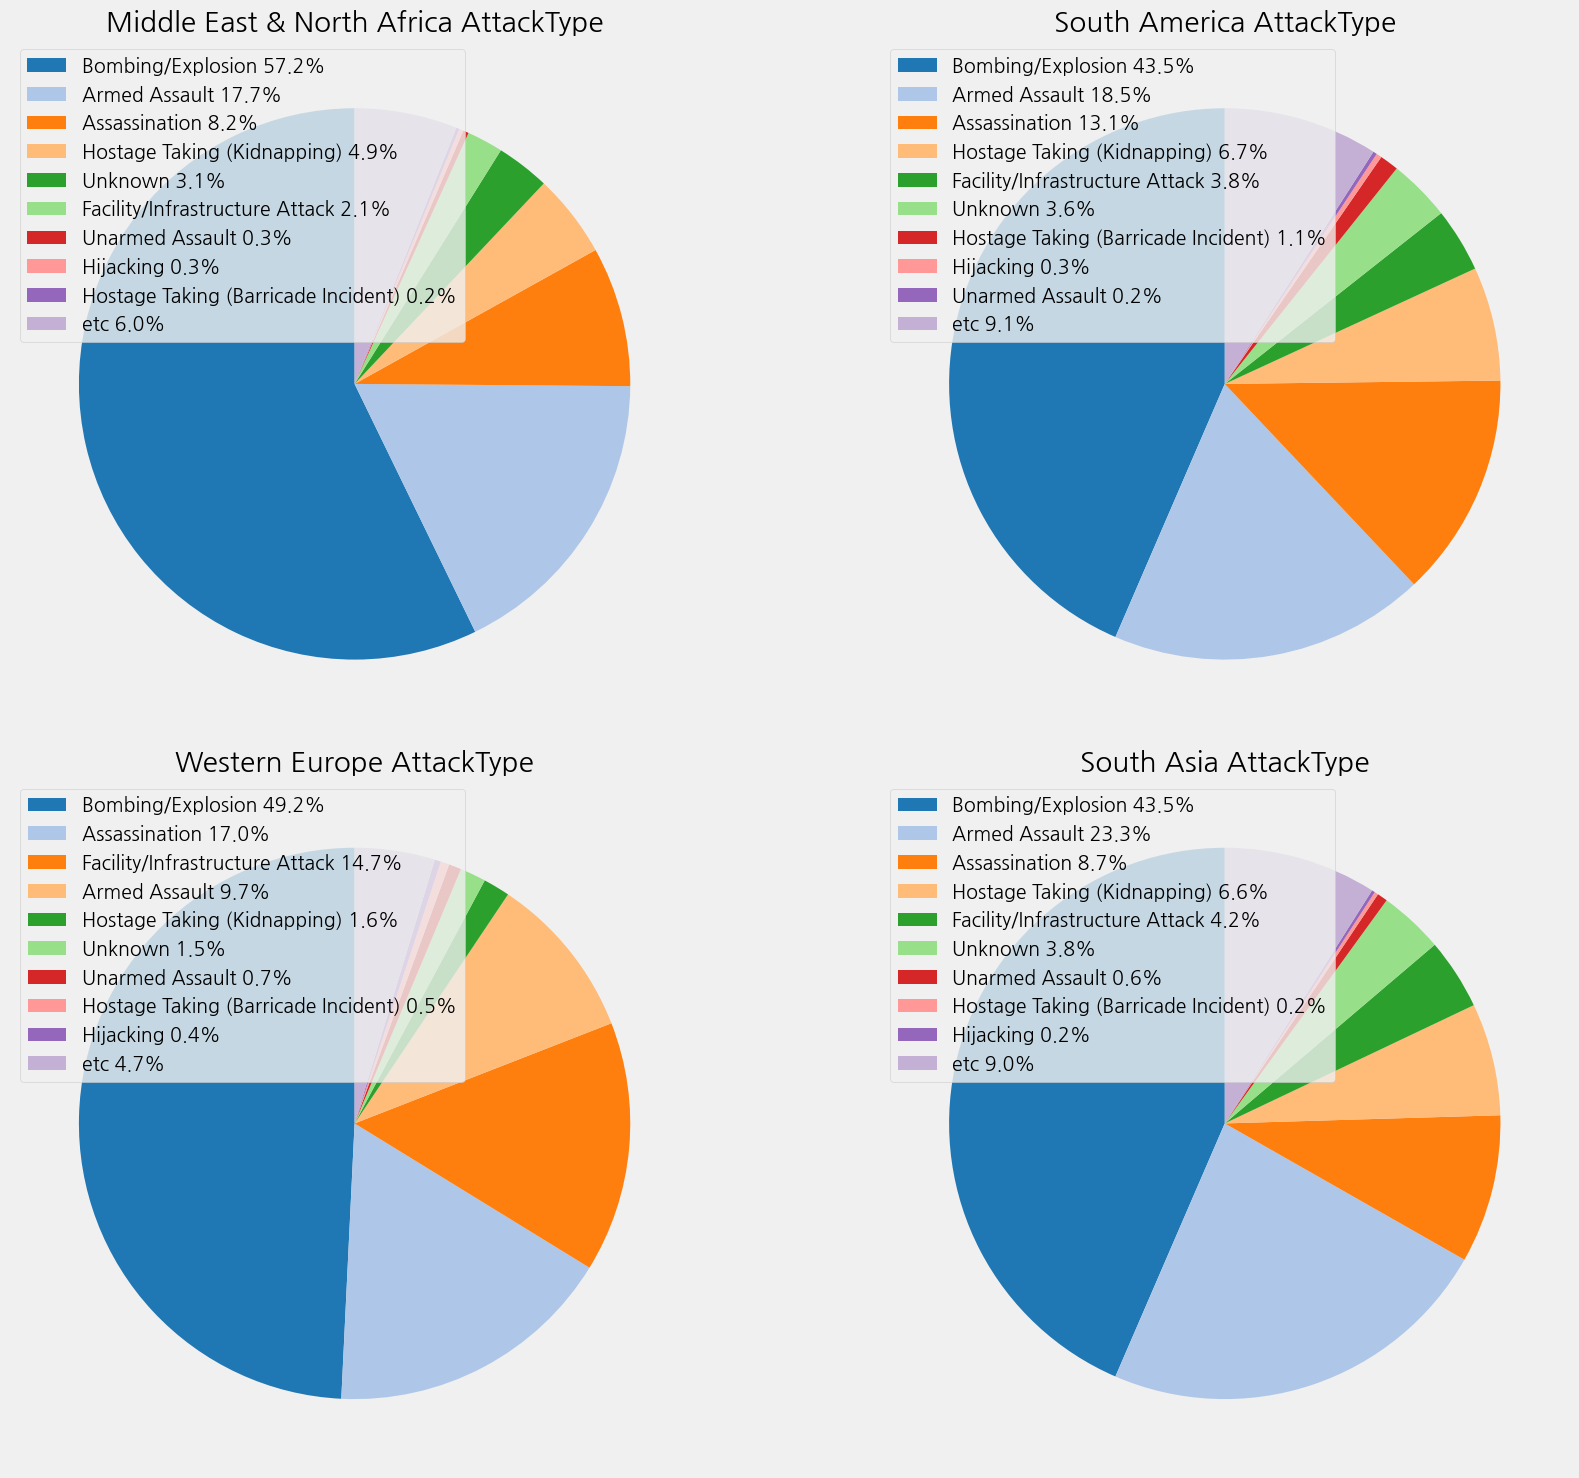

In [27]:
# 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# 색상 팔레트 생성
colors = plt.cm.tab20.colors



# Middle East & North Africa 지역에 대한 파이차트
axs[0, 0].pie(middle_east_north_africa_attack_type_combined, startangle=90, colors=colors)
axs[0, 0].set_title('Middle East & North Africa AttackType')
axs[0, 0].legend(labels=middle_east_north_africa_attack_type_combined.index + ' ' + middle_east_north_africa_attack_type_combined.apply(lambda x: f'{x / middle_east_north_africa_attack_type_combined.sum() * 100:.1f}%'), loc='upper left')

# South America 지역에 대한 파이차트
axs[0, 1].pie(south_america_attack_type_combined, startangle=90, colors=colors)
axs[0, 1].set_title('South America AttackType')
axs[0, 1].legend(labels=south_america_attack_type_combined.index + ' ' + south_america_attack_type_combined.apply(lambda x: f'{x / south_america_attack_type_combined.sum() * 100:.1f}%'), loc='upper left')

# Western Europe 지역에 대한 파이차트
axs[1, 0].pie(western_europe_attack_type_combined, startangle=90, colors=colors)
axs[1, 0].set_title('Western Europe AttackType')
axs[1, 0].legend(labels=western_europe_attack_type_combined.index + ' ' + western_europe_attack_type_combined.apply(lambda x: f'{x / western_europe_attack_type_combined.sum() * 100:.1f}%'), loc='upper left')

# South Asia 지역에 대한 파이차트
axs[1, 1].pie(south_asia_attack_type_combined, startangle=90, colors=colors)
axs[1, 1].set_title('South Asia AttackType')
axs[1, 1].legend(labels=south_asia_attack_type_combined.index + ' ' + south_asia_attack_type_combined.apply(lambda x: f'{x / south_asia_attack_type_combined.sum() * 100:.1f}%'), loc='upper left')

plt.tight_layout()
plt.show()

### Step 4.3 사상자 비교

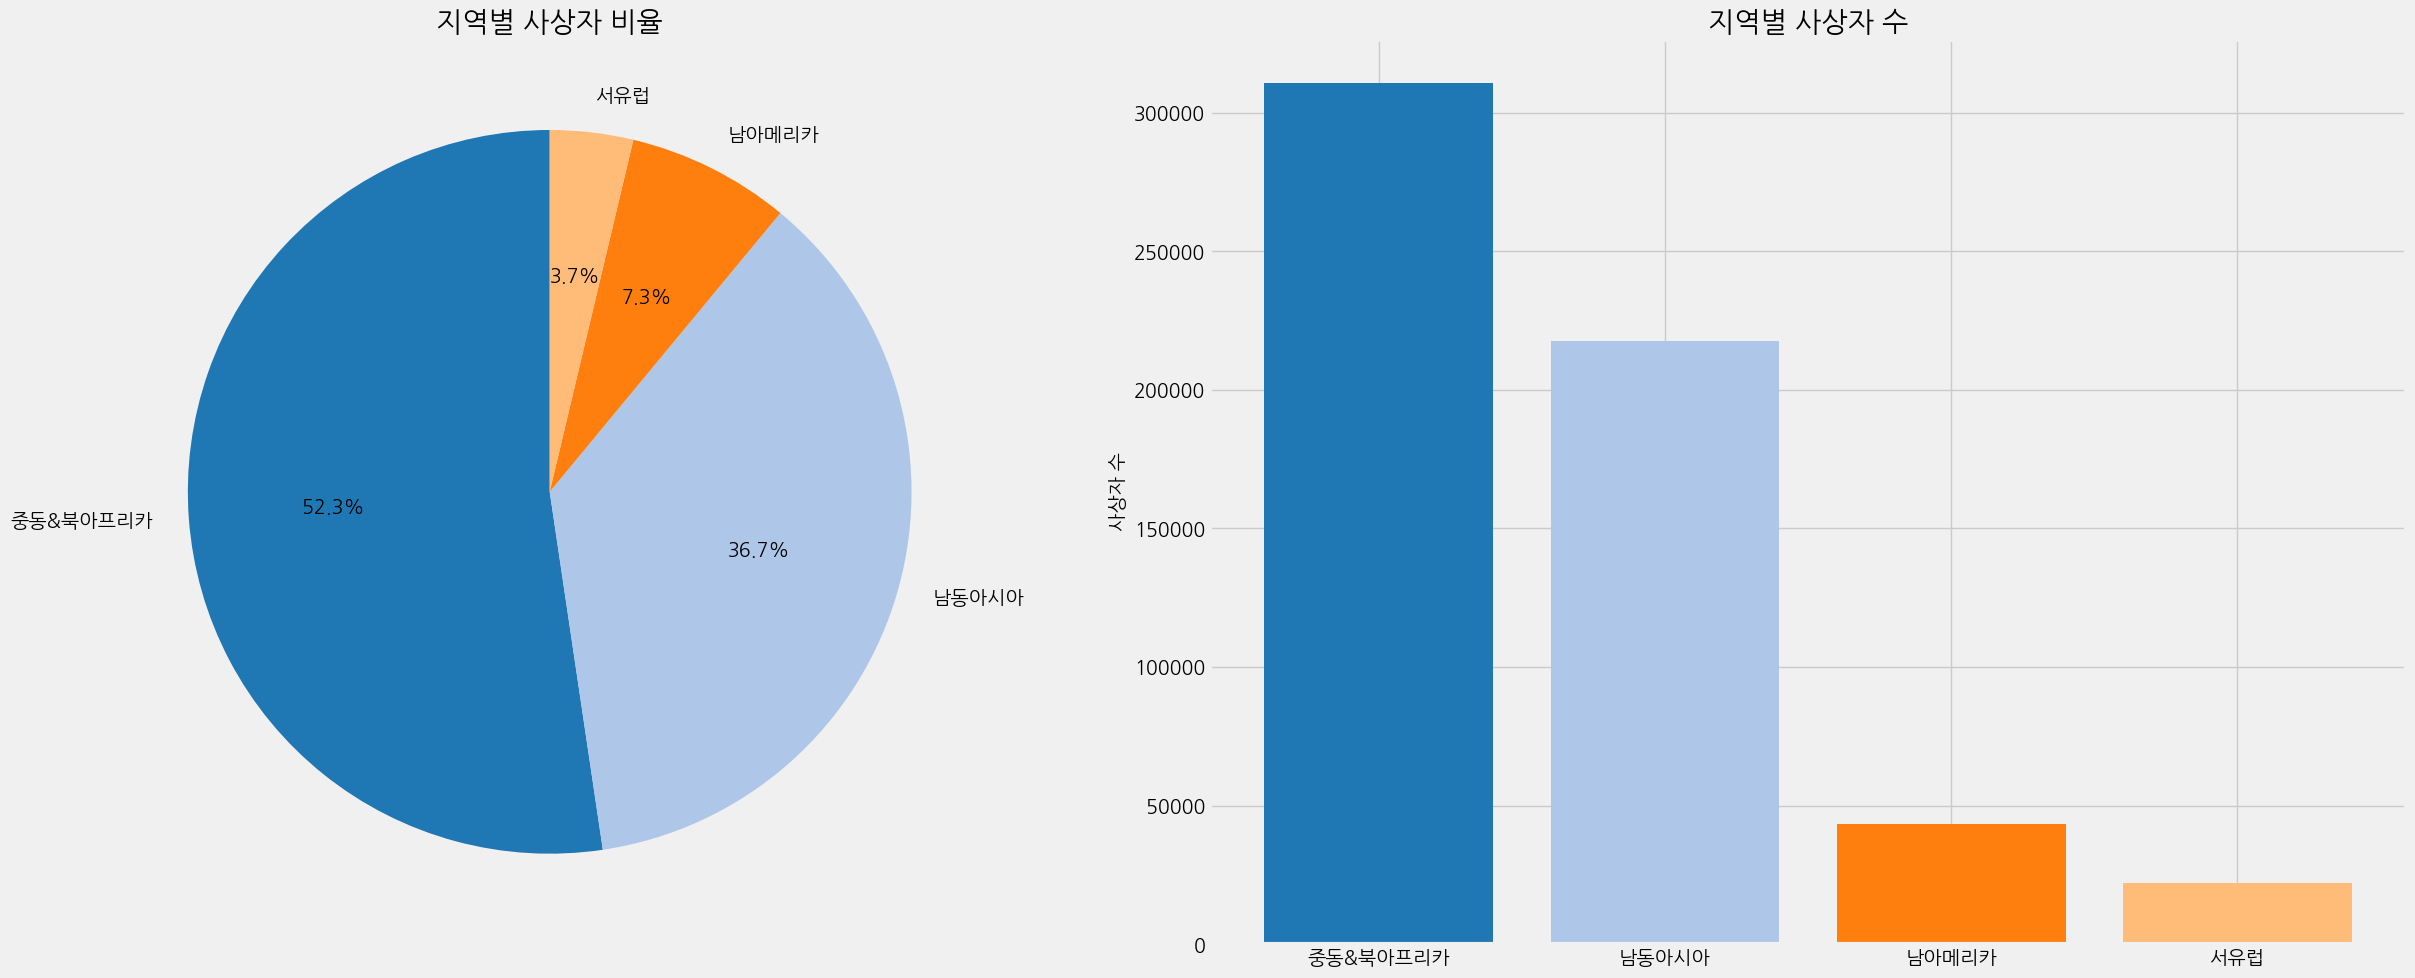

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 네 개 지역의 casualities 값 합치기
casualities_combined = pd.concat([middle_east_north_africa_data['casualities'], south_america_data['casualities'], western_europe_data['casualities'], south_asia_data['casualities']])

# NaN 값 제외
casualities_combined.dropna(inplace=True)

# 네 개 지역의 casualities 합계 계산
total_casualities = casualities_combined.sum()

# 파이차트 데이터 준비
regions = ['중동&북아프리카', '남아메리카', '서유럽', '남동아시아']
casualties_sum = [middle_east_north_africa_data['casualities'].sum(), south_america_data['casualities'].sum(), western_europe_data['casualities'].sum(), south_asia_data['casualities'].sum()]

# 데이터를 내림차순으로 정렬
regions, casualties_sum = zip(*sorted(zip(regions, casualties_sum), key=lambda x: x[1], reverse=True))

# 파이차트 그리기
plt.figure(figsize=(25, 10))

# 파이차트 그리기
plt.subplot(1, 2, 1)
plt.pie(casualties_sum, labels=regions, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('지역별 사상자 비율')

# 파이차트 위의 텍스트 제거
plt.gca().set_ylabel('')

# 범례 추가
plt.subplot(1, 2, 2)
plt.bar(regions, casualties_sum, color=plt.cm.tab20.colors)
plt.title('지역별 사상자 수')
plt.ylabel('사상자 수')

plt.tight_layout()
plt.show()

# Step 5 테러 위험성 시각화
<hr>

+ 세계 지도 위에 테러 발생을 표시 + 테러 피해 이미지 같이 플롯


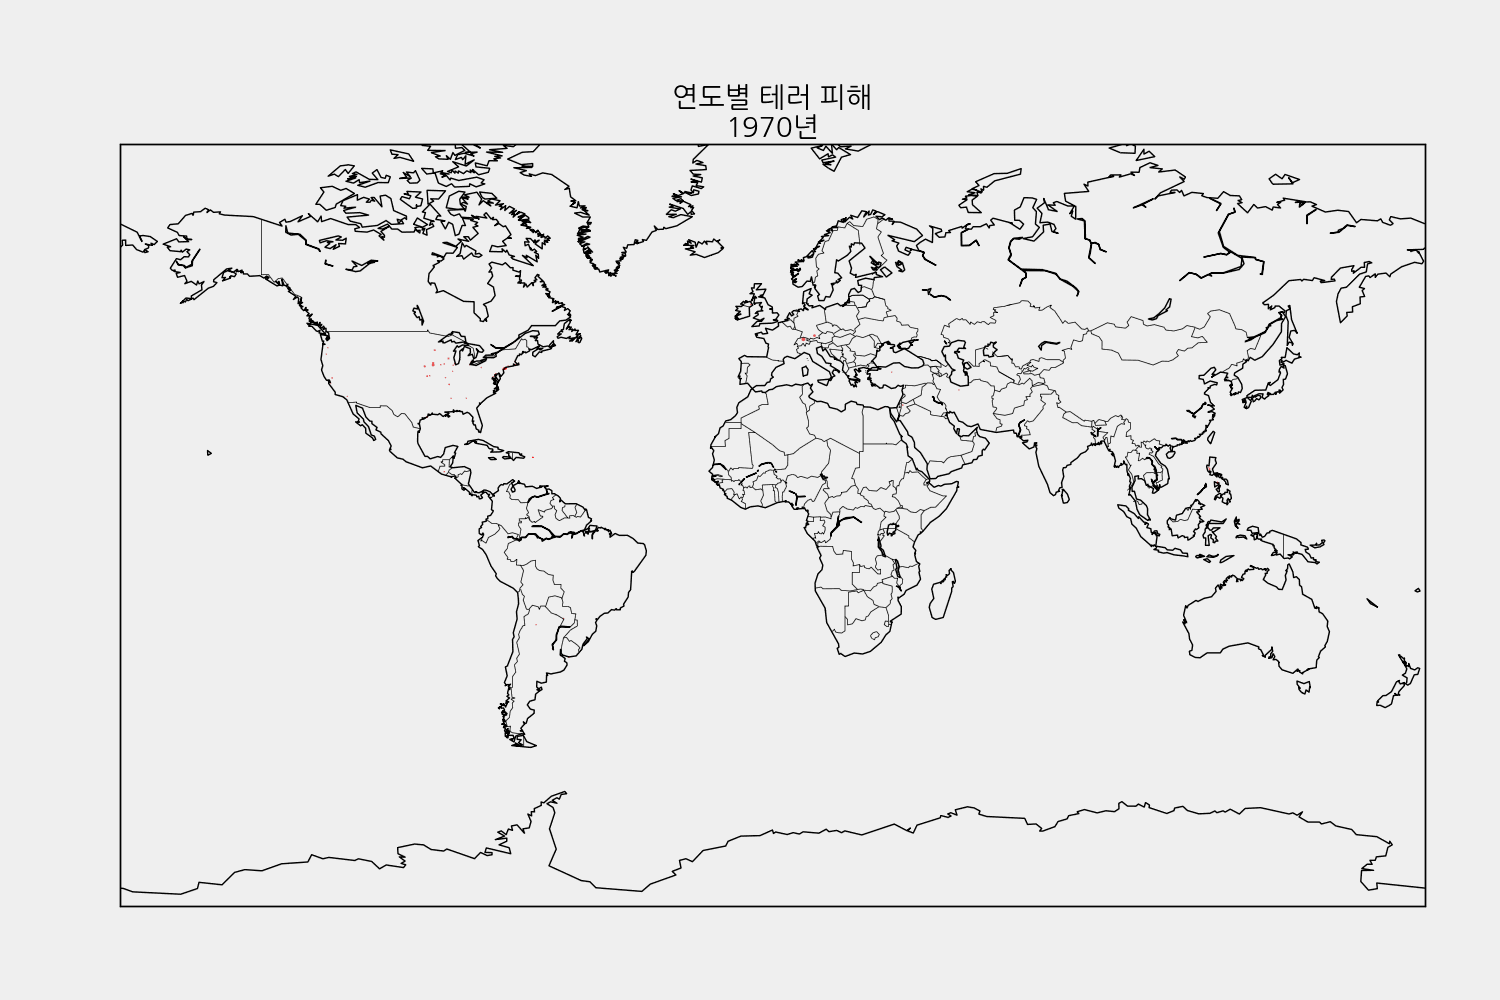

In [29]:
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15, 10))
ax = plt.axes()

def animate_map(Year):
    ax.clear()
    m6 = Basemap(projection='mill',
                 llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20,
                 resolution='c')
    
    lat6 = list(terror[terror['Year'] == Year].latitude)
    long6 = list(terror[terror['Year'] == Year].longitude)
    
    x6, y6 = m6(long6, lat6)
    m6.scatter(x6, y6, s=[(kill + wound) * 0.1 
                          for kill, wound in 
                              zip(terror[terror['Year'] == Year].Killed,
                                  terror[terror['Year'] == Year].Wounded)],
               color='r')
    
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder=1, alpha=0.4)
    m6.drawmapboundary()

    ax.set_title('연도별 테러 피해'+'\n'+ str(Year)+'년')

    
ani = animation.FuncAnimation(fig, animate_map, list(terror.Year.unique()), 
                              interval=1500)    
ani.save('animation.gif', writer='pillow', fps=1)
plt.close(1)

filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
path = '''<img src="data:image/gif;base64,{0}" type="gif" />'''
HTML(data=path.format(encoded.decode('ascii')))

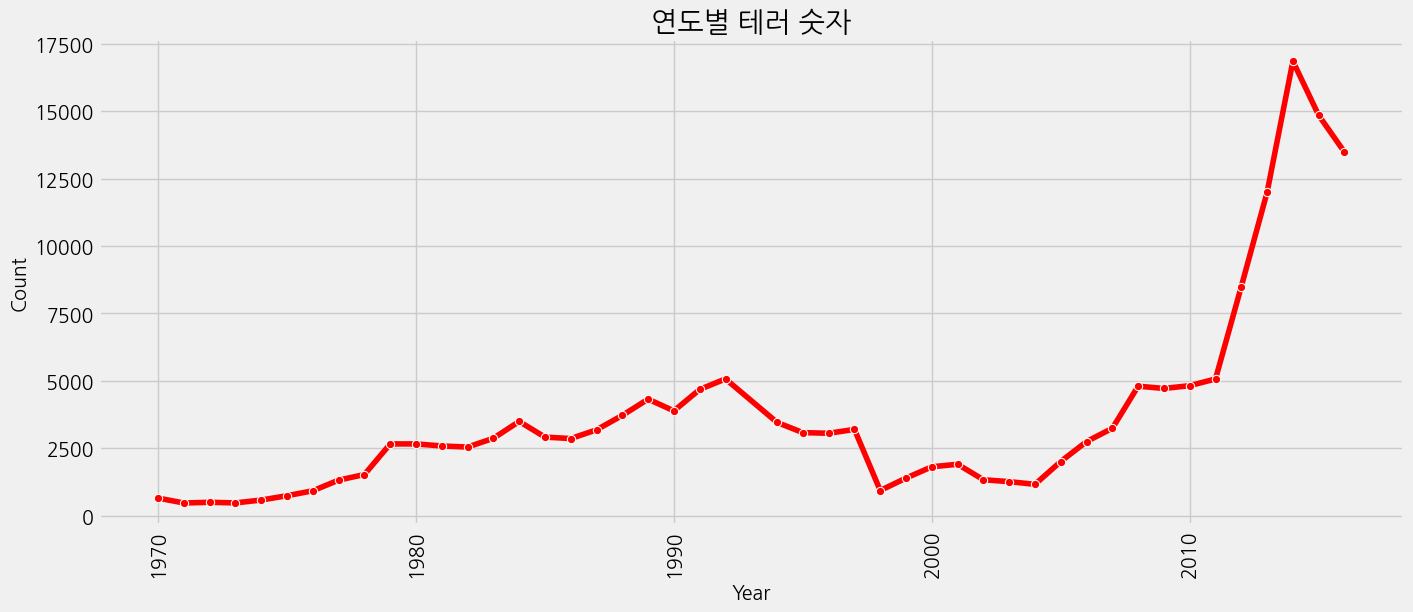

In [30]:
plt.subplots(figsize=(15,6))
sns.lineplot(x='Year', y='Count', data=terror.groupby('Year').size().reset_index(name='Count'), marker='o', color='red')
plt.xticks(rotation=90)
plt.title('연도별 테러 숫자')
plt.show()


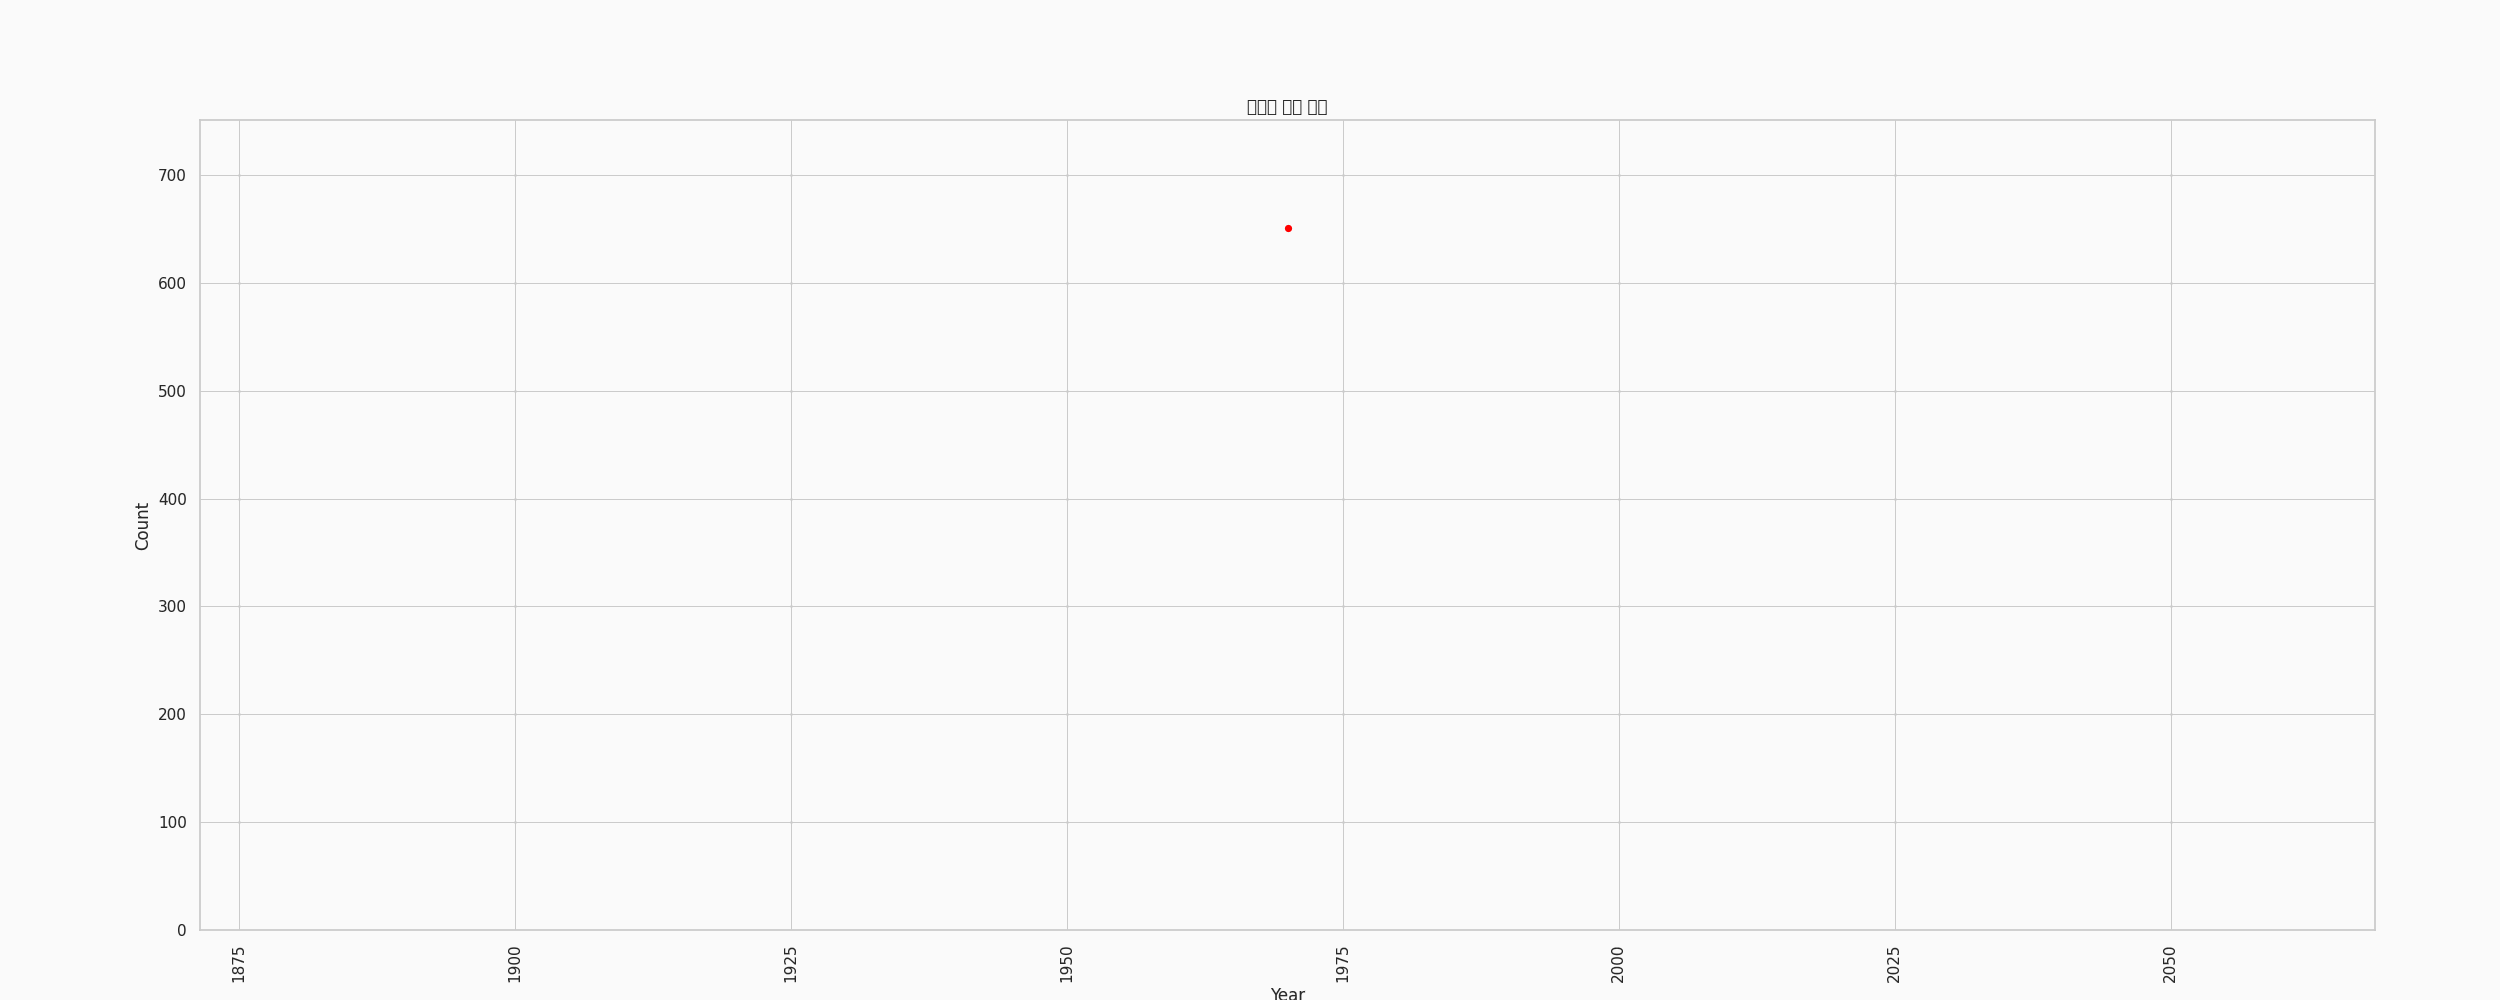

In [31]:
# 애니메이션 및 기타 설정
warnings.filterwarnings('ignore')

# 그래프 초기화
plt.figure(figsize=(25,10))
sns.set(style="whitegrid")

# 에니메이션 함수 정의
def animate_graph(Year):
    # 연도별 테러 수 계산
    terror_year_count = terror[terror['Year'] <= Year].groupby('Year').size().reset_index(name='Count')
    
    # 그래프 업데이트
    plt.clf()
    sns.lineplot(x='Year', y='Count', data=terror_year_count, marker='o', color='red')
    plt.xticks(rotation=90)
    plt.title('연도별 테러 피해')
    plt.ylim(0, max(terror_year_count['Count'])+100)  # y축 범위 조정
    plt.xlim(min(terror_year_count['Year']), max(terror_year_count['Year']))  # x축 범위 조정

# 애니메이션 생성
ani = animation.FuncAnimation(plt.gcf(), animate_graph, frames=list(terror['Year'].unique()), interval=1000)

# 애니메이션 저장
ani.save('terror_animation.gif', writer='pillow', fps=1)
plt.close()

# 애니메이션을 HTML로 표시
filename = 'terror_animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
path = '''<img src="data:image/gif;base64,{0}" type="gif" />'''
HTML(data=path.format(encoded.decode('ascii')))

<hr>

# 레퍼런스 코드 (짬통...)


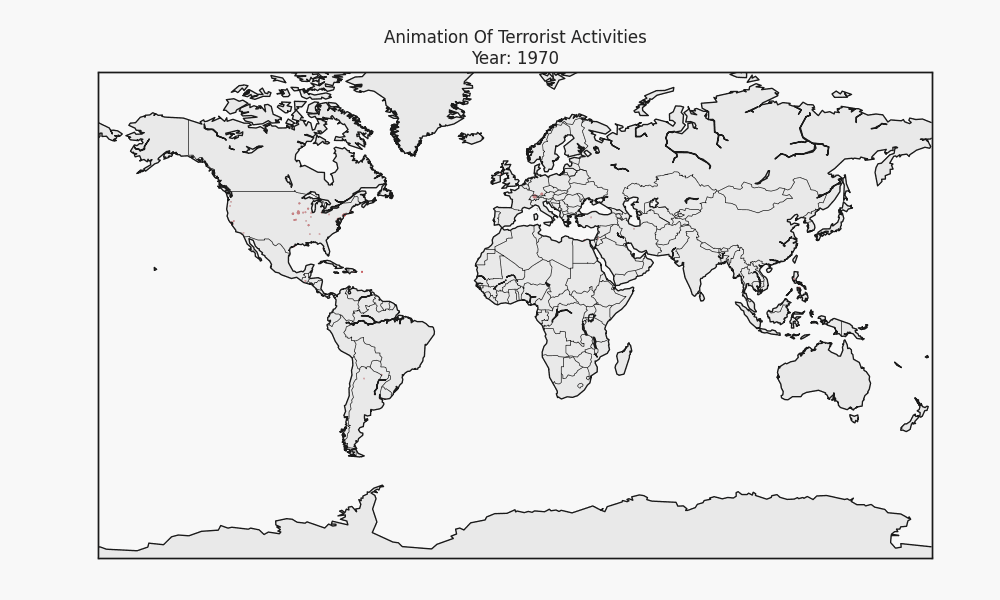

In [32]:
from matplotlib import animation, rc
import io
import base64
from IPython.display import HTML
import warnings
from mpl_toolkits.basemap import Basemap
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(10, 6))
ax = plt.axes()

def animate(Year):
    ax.clear()
    m6 = Basemap(projection='mill',
                 llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20,
                 resolution='c')
    
    lat6 = list(terror[terror['Year'] == Year].latitude)
    long6 = list(terror[terror['Year'] == Year].longitude)
    
    x6, y6 = m6(long6, lat6)
    m6.scatter(x6, y6, s=[(kill + wound) * 0.1 
                          for kill, wound in 
                              zip(terror[terror['Year'] == Year].Killed,
                                  terror[terror['Year'] == Year].Wounded)],
               color='r')
    
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder=1, alpha=0.4)
    m6.drawmapboundary()

    ax.set_title('Animation Of Terrorist Activities'+'\n'+'Year: ' + str(Year))

    
ani = animation.FuncAnimation(fig, animate, list(terror.Year.unique()), 
                              interval=1500)    
ani.save('animation.gif', writer='pillow', fps=1)
plt.close(1)

filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
path = '''<img src="data:image/gif;base64,{0}" type="gif" />'''
HTML(data=path.format(encoded.decode('ascii')))

In [33]:
terror_killed_sort = terror.sort_values('Killed', ascending=False)[:1000]

map2 = folium.Map(location=[30,0], tiles='CartoDB dark_matter', zoom_start=2)
for _, row in terror_killed_sort[0:100].iterrows():
    if ~np.isnan(row['latitude']):
        folium.CircleMarker(location=[row['latitude'], row['longitude']],
                            radius=row['Killed']/100, fill=True,
                            color='red', fill_opacity=0.7).add_to(map2)
map2